In [1]:

import pandas as pd

# update this path if needed
path = "/Users/riyadmazari/Desktop/group project/Car details v3.csv"
df = pd.read_csv(path)

print("✅ Loaded:", len(df), "rows,", len(df.columns), "columns")
df.head()

✅ Loaded: 8128 rows, 13 columns


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

=== FIRST 5 ROWS ===
                           name  year  selling_price  km_driven    fuel seller_type transmission         owner     mileage 

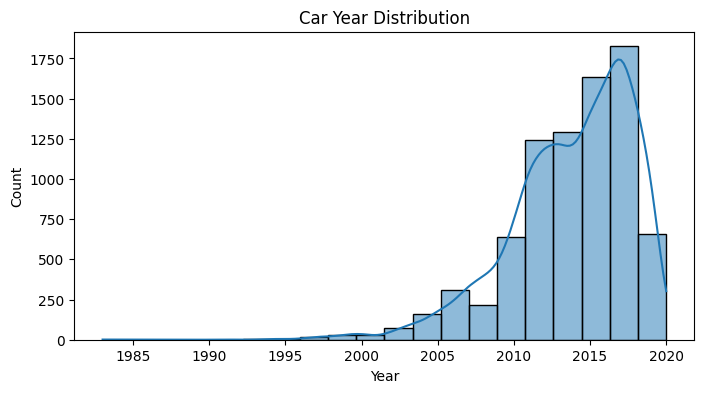

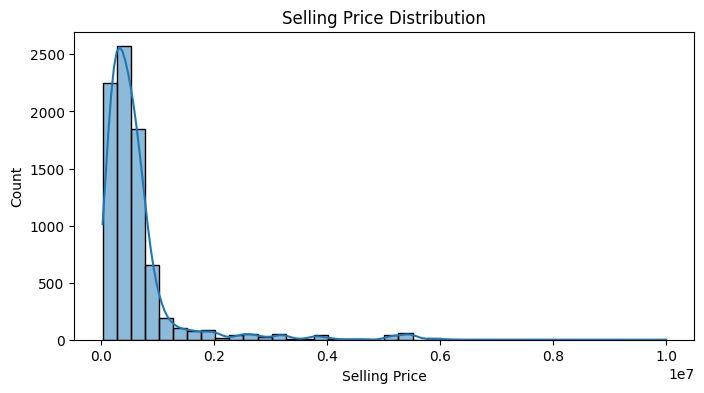

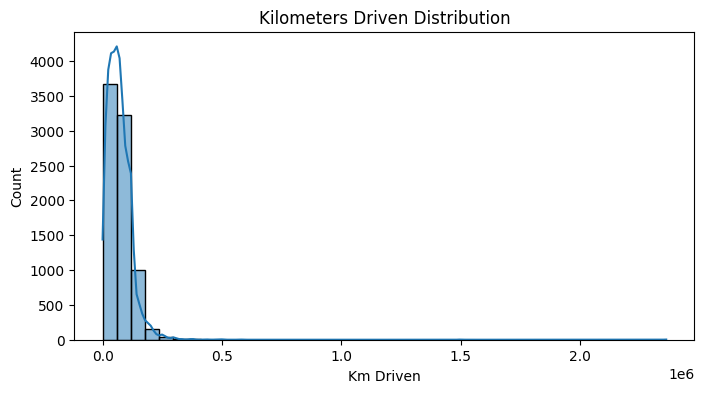

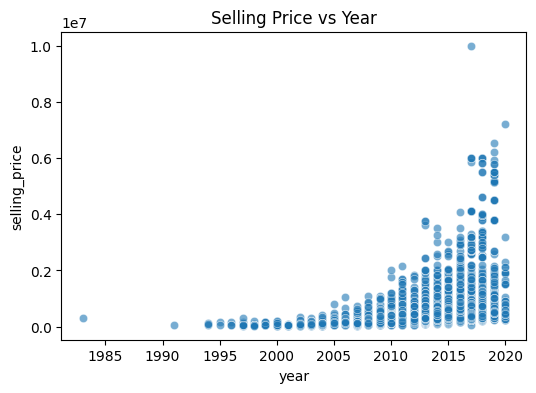

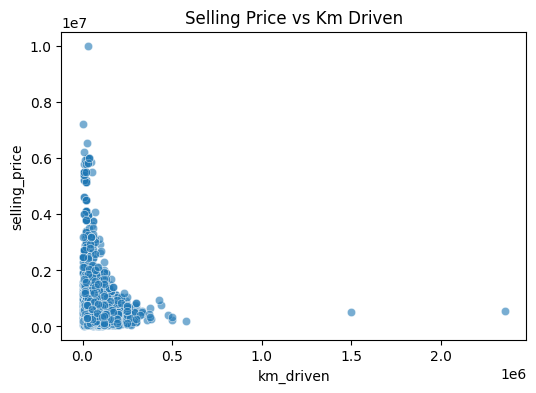

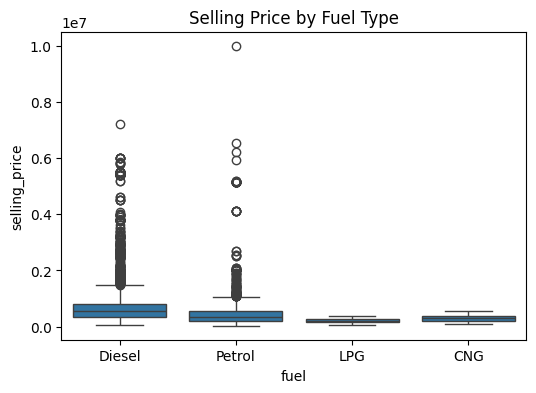

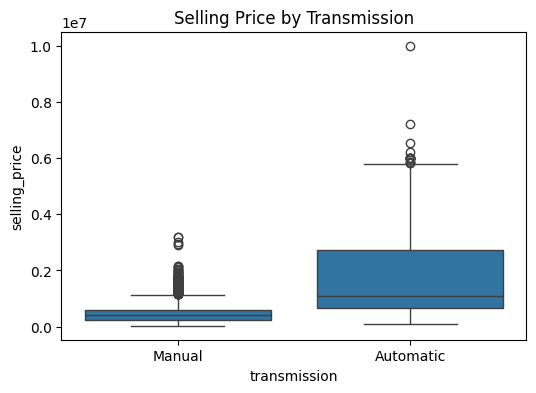


=== OUTLIER COUNTS (IQR method) ===
selling_price: 600
km_driven: 170
seats: 1653

=== SAMPLE 'name' values ===
['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition', 'Honda City 2017-2020 EXi', 'Hyundai i20 Sportz Diesel', 'Maruti Swift VXI BSIII', 'Hyundai Xcent 1.2 VTVT E Plus', 'Maruti Wagon R LXI DUO BSIII', 'Maruti 800 DX BSII', 'Toyota Etios VXD', 'Ford Figo Diesel Celebration Edition']

=== CORRELATION MATRIX ===
                   year  selling_price  km_driven
year           1.000000       0.414092  -0.418006
selling_price  0.414092       1.000000  -0.225534
km_driven     -0.418006      -0.225534   1.000000


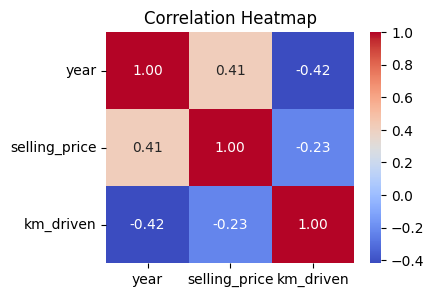


=== DATA QUALITY FLAGS ===
No obvious data issues found.


In [16]:
# =========================
# 2) EXPLORATORY DATA ANALYSIS (EDA)
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

TODAY_YEAR = datetime.now().year
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

print("=== BASIC INFO ===")
print(df.info())
print("\n=== FIRST 5 ROWS ===")
print(df.head())
print("\n=== SHAPE ===")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

# ----- MISSING VALUES -----
print("\n=== MISSING VALUES (%) ===")
print((df.isna().mean() * 100).round(2).sort_values(ascending=False))

# ----- DUPLICATES -----
print("\n=== DUPLICATE ROWS ===")
print(df.duplicated().sum())

# ----- BASIC STATS -----
num_cols = ["year", "selling_price", "km_driven", "seats"]
print("\n=== NUMERIC SUMMARY ===")
print(df[num_cols].describe().T)

# ----- CATEGORICAL FEATURES -----
cat_cols = ["fuel", "seller_type", "transmission", "owner"]
for c in cat_cols:
    if c in df.columns:
        print(f"\n[{c}]")
        print(df[c].value_counts(dropna=False))

# ----- UNIQUE VALUES -----
print("\n=== UNIQUE VALUES PER COLUMN ===")
print(df.nunique())

# ----- YEAR DISTRIBUTION -----
plt.figure(figsize=(8,4))
sns.histplot(df["year"], bins=20, kde=True)
plt.title("Car Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# ----- SELLING PRICE DISTRIBUTION -----
plt.figure(figsize=(8,4))
sns.histplot(df["selling_price"], bins=40, kde=True)
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

# ----- KM_DRIVEN DISTRIBUTION -----
plt.figure(figsize=(8,4))
sns.histplot(df["km_driven"], bins=40, kde=True)
plt.title("Kilometers Driven Distribution")
plt.xlabel("Km Driven")
plt.ylabel("Count")
plt.show()

# ----- RELATIONSHIPS -----
plt.figure(figsize=(6,4))
sns.scatterplot(x="year", y="selling_price", data=df, alpha=0.6)
plt.title("Selling Price vs Year")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="km_driven", y="selling_price", data=df, alpha=0.6)
plt.title("Selling Price vs Km Driven")
plt.show()

# ----- FUEL TYPE vs PRICE -----
plt.figure(figsize=(6,4))
sns.boxplot(x="fuel", y="selling_price", data=df)
plt.title("Selling Price by Fuel Type")
plt.show()

# ----- TRANSMISSION vs PRICE -----
plt.figure(figsize=(6,4))
sns.boxplot(x="transmission", y="selling_price", data=df)
plt.title("Selling Price by Transmission")
plt.show()

# ----- OUTLIER CHECK (quick numeric) -----
def iqr_outlier_count(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < lower) | (series > upper)).sum()

print("\n=== OUTLIER COUNTS (IQR method) ===")
for c in ["selling_price", "km_driven", "seats"]:
    if c in df.columns:
        print(f"{c}: {iqr_outlier_count(df[c])}")

# ----- CHECK TEXTUAL FIELDS -----
print("\n=== SAMPLE 'name' values ===")
print(df["name"].head(10).to_list())

# ----- CORRELATION -----
num_cols_for_corr = ["year", "selling_price", "km_driven"]
corr = df[num_cols_for_corr].corr(numeric_only=True)
print("\n=== CORRELATION MATRIX ===")
print(corr)

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ----- BASIC SANITY CHECKS -----
issues = []
if (df["selling_price"] <= 0).any():
    issues.append("Non-positive selling_price detected.")
if (df["km_driven"] <= 0).any():
    issues.append("Non-positive km_driven detected.")
if (df["year"] > TODAY_YEAR).any():
    issues.append("Future 'year' values detected.")
print("\n=== DATA QUALITY FLAGS ===")
print(issues if issues else "No obvious data issues found.")


In [ ]:
# =========================
# CLEAN + ENCODE (with brand + car name encoding) — fixed
# =========================
import os, re
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# --- parameters ---
USE_HASH_FOR_NAME = False       # False = top-K one-hot; True = hashing
TOP_K_NAMES = 100               # for one-hot mode
NAME_HASH_DIM = 64              # for hashing mode
TODAY_YEAR = datetime.now().year
os.makedirs("exports", exist_ok=True)

# ---------- 1) basic cleanup ----------
df_clean = df.copy()
for c in ["name","fuel","seller_type","transmission","owner","mileage","engine","max_power","torque"]:
    if c in df_clean.columns:
        df_clean[c] = (df_clean[c].astype(str)
                       .str.strip()
                       .replace({"nan": np.nan, "None": np.nan, "": np.nan}))

before = len(df_clean)
df_clean = df_clean.drop_duplicates(keep="first").reset_index(drop=True)
print(f"[dedupe] dropped {before - len(df_clean)} duplicates")

# ---------- 2) feature engineering ----------
df_clean["car_age"] = (TODAY_YEAR - df_clean["year"]).clip(lower=0)

def to_float(text):
    if pd.isna(text): return np.nan
    s = re.sub(r"[^\d.]", "", str(text))
    return float(s) if s else np.nan

df_clean["engine_cc"]   = df_clean["engine"].apply(to_float)
df_clean["power_bhp"]   = df_clean["max_power"].apply(to_float)
df_clean["mileage_val"] = df_clean["mileage"].apply(to_float)

df_clean["owner"] = df_clean["owner"].replace({
    "First Owner": "First",
    "Second Owner": "Second",
    "Third Owner": "Third+",
    "Fourth & Above Owner": "Third+",
    "Test Drive Car": "TestDrive"
})

bad = (df_clean["seats"] < 2) | (df_clean["seats"] > 9)
df_clean.loc[bad, "seats"] = np.nan

for c in ["mileage_val","engine_cc","power_bhp"]:
    zeros = (df_clean[c] == 0).sum(skipna=True)
    if zeros:
        df_clean.loc[df_clean[c]==0, c] = np.nan
        print(f"[fix-zero] {c}: {zeros}")

for c in ["selling_price","km_driven","engine_cc","power_bhp"]:
    lo, hi = df_clean[c].quantile([0.01, 0.99])
    df_clean[c] = df_clean[c].clip(lo, hi)

for c in ["km_driven","engine_cc","power_bhp"]:
    df_clean[f"log_{c}"] = np.log1p(df_clean[c])

def extract_make(name):
    if not isinstance(name,str) or not name: return np.nan
    t = name.split()
    if not t: return np.nan
    if t[0]=="Land" and len(t)>1 and t[1]=="Rover": return "Land Rover"
    if t[0]=="Mercedes-Benz": return t[0]
    return t[0]

df_clean["make"] = df_clean["name"].apply(extract_make)

# ---------- 3) encode categoricals ----------
num_features = ["year","car_age","km_driven","engine_cc","power_bhp",
                "mileage_val","seats","log_km_driven","log_engine_cc","log_power_bhp"]
cat_features = ["fuel","seller_type","transmission","owner","make"]

imp = SimpleImputer(strategy="most_frequent")
df_clean[cat_features] = imp.fit_transform(df_clean[cat_features])

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cat_arr = ohe.fit_transform(df_clean[cat_features])
cat_cols = ohe.get_feature_names_out(cat_features)
df_cat_enc = pd.DataFrame(cat_arr, columns=cat_cols, index=df_clean.index)
print(f"[encode] {len(cat_cols)} categorical features")

# ---------- 4) encode full car names ----------
if USE_HASH_FOR_NAME:
    from sklearn.feature_extraction.text import HashingVectorizer
    hv = HashingVectorizer(n_features=NAME_HASH_DIM,
                           alternate_sign=False,
                           lowercase=True,
                           token_pattern=r"(?u)\b\w+\b")
    name_mat = hv.transform(df_clean["name"].fillna(""))
    df_name_enc = pd.DataFrame(name_mat.toarray(),
                               columns=[f"name_hash_{i}" for i in range(NAME_HASH_DIM)],
                               index=df_clean.index)
    print(f"[encode] name via hashing → {NAME_HASH_DIM} columns")
else:
    counts = df_clean["name"].value_counts()
    top_names = set(counts.head(TOP_K_NAMES).index)
    df_clean["name_topk"] = np.where(df_clean["name"].isin(top_names),
                                     df_clean["name"], "Other")
    ohe_name = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    name_arr = ohe_name.fit_transform(df_clean[["name_topk"]])
    # FIXED: simpler column names, no split('=')
    name_cols = [c.replace("name_topk_", "name_") for c in ohe_name.get_feature_names_out()]
    df_name_enc = pd.DataFrame(name_arr, columns=name_cols, index=df_clean.index)
    print(f"[encode] name via top-{TOP_K_NAMES} one-hot (+Other) → {len(name_cols)} columns")

# ---------- 5) assemble final dataset ----------
df_final = pd.concat(
    [df_clean[["name","selling_price"] + num_features + cat_features].reset_index(drop=True),
     df_cat_enc.reset_index(drop=True),
     df_name_enc.reset_index(drop=True)],
    axis=1
)

print("✅ final dataset ready")
print("shape:", df_final.shape)
print("preview columns:", df_final.columns[:15].tolist())

df_final.to_csv("exports/final_cars_dataset_encoded.csv", index=False)
print("💾 saved → exports/final_cars_dataset_encoded.csv")


[dedupe] dropped 1202 duplicate rows
[encode] one-hot for ['fuel', 'seller_type', 'transmission', 'owner', 'make'] → 45 columns


IndexError: list index out of range